# Assignment 3: Clustering California Housing with K-means

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
"Tonight, more than 130,000 Californians will go to sleep homeless. That’s enough to fill Dodger Stadium, AT&T Park and Petco Park. The biggest culprit is rising housing costs. From 2000 to 2014, median rent in California increased by more than one-third, while real incomes for renters fell by 7 percent. Today, 1.5 million Californians spend more than half their income on housing. This crisis threatens not just low-income families but our entire economy, driving businesses to relocate to states in which their employees can afford to live. - **Business Insider, Sep 2018.**"

![Half of the homes in San Franciso is now one million or above](https://amp.businessinsider.com/images/573de0b88d3eaea27198a55d-960-480.jpg)

In this assignment, you will attempt to cluster the California Housing by implementing and analyzing the k-means algorithm to the data. K-Means is one of the most popular clustering algorithms. K-means stores k-centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. For references, you may refer to my lecture 9 or Chapter 2 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.

**Note**: In order for your assignment to be graded, you must save your Notebook filename under this format: **yourUvaUserId_assignment_3_kmeans.ipynb**.


---
## 1. PRE-PROCESSING THE DATA (10 pts)

Download the California Housing dataset from the below link. This dataset includes statistics about the median income, median age, average number of rooms per person, average number of persons in a household etc. The statistics were gathered per geographical block.

**Data Acquiring:** Download the dataset from https://www.kaggle.com/camnugent/california-housing-prices

**Data Discovery, Visualization, and Cleaning:** Fortunately, this step have been given to you from chapter 2. However, you should review them and write the code necessary for the purposes of this assignment. 

In [0]:
# You might want to use the following package
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Your code goes here for this section.

In [0]:
import os
from six.moves import urllib
# get data
DOWNLOAD_URL = 'https://raw.githubusercontent.com/OAHC2022/ML-4774/master/Assignment3/housing.csv'
STORE_LOCATION = os.path.join("datasets", "housing")

def retrieve_data(housing_url=DOWNLOAD_URL, housing_path=STORE_LOCATION):
  if not os.path.isdir(housing_path):
    os.makedirs(housing_path)
  csv_path = os.path.join(housing_path,'housing.csv')
  urllib.request.urlretrieve(housing_url, csv_path)

In [0]:
retrieve_data()

In [0]:
import pandas as pd # Pandas module to enable data manipulation
def load_housing_data(housing_path=STORE_LOCATION):
    """Load Housing Data into Workspace from a CSV"""
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [0]:
housing = load_housing_data()
# Display the first n rows of the data. (n=5 by default)
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [0]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


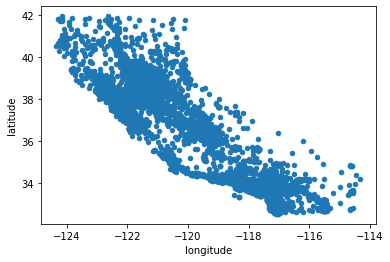

In [0]:
housing.plot(kind="scatter", x="longitude", y="latitude")


In [0]:
# deal with incomplete values
imputer = SimpleImputer(strategy='median')
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit_transform(housing_num)

array([[-1.2223e+02,  3.7880e+01,  4.1000e+01, ...,  1.2600e+02,
         8.3252e+00,  4.5260e+05],
       [-1.2222e+02,  3.7860e+01,  2.1000e+01, ...,  1.1380e+03,
         8.3014e+00,  3.5850e+05],
       [-1.2224e+02,  3.7850e+01,  5.2000e+01, ...,  1.7700e+02,
         7.2574e+00,  3.5210e+05],
       ...,
       [-1.2122e+02,  3.9430e+01,  1.7000e+01, ...,  4.3300e+02,
         1.7000e+00,  9.2300e+04],
       [-1.2132e+02,  3.9430e+01,  1.8000e+01, ...,  3.4900e+02,
         1.8672e+00,  8.4700e+04],
       [-1.2124e+02,  3.9370e+01,  1.6000e+01, ...,  5.3000e+02,
         2.3886e+00,  8.9400e+04]])

In [0]:
# deal with category data
housing_cat = housing[["ocean_proximity"]]
cat_encoder = OneHotEncoder()
cat_encoder.fit_transform(housing_cat)

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [0]:
# Use pipeline
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
])

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])
housing_prepared = full_pipeline.fit_transform(housing)

In [0]:
print(housing.shape)
print(housing_prepared.shape)

(20640, 10)
(20640, 14)


In [0]:
len(housing_prepared)

20640

- - -
## 2. IMPLEMENTING K-MEANS (40 pts)

You must implement your own version of K-Means Algorithm. Input a cluster count K and M data points each with its own vector of N features, along with the choice of a distance measure; then:

1. Initialize K centroids. In our case, a centroid is just the average of all data in a cluster.
2. Assign each data point to the cluster that has the closest centroid base on a **distance measure** below.
3. After all data points have been assigned to clusters, recalculate the centroids for each cluster (as averages of all points in the cluster).
4. Repeat the data assignments and centroid calculations until no change in housing assignment occurs between iterations.

**Distance Measures:** Your implementation must include three distance metrics: Manhattan Distance, Euclidean Distance, Sup Distance. These 3 distance metrics can be generalized by the Minkovski Distance:
$D(\mathbf{x},\mathbf{y}) = \sqrt[\leftroot{2}\uproot{2}p]{\sum\limits_{i=1}^n|x_i - y_i|^p}$ where $p=1$ for Mahattan, $p=2$ for Euclidean, and $p=\infty$ for Sup Distance.

**Implementation Notes:** Note that your functions should return distance measures; that is, the returned value should be high if the two vectors are dissimilar, low if they are similar, and zero if they are completely identical.

In [0]:
import numpy as np
np.random.seed(42)
import sys
# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).
class Cluster:
  def __init__(self):
    self.nodes = []
  
  def AddNode(self,data):
    self.nodes.append(data)

  def getNodes(self):
    return np.asarray(self.nodes)
  
  def Clear(self):
    self.nodes = []
  
  def ComputeSTD(self):
    arr = np.asarray(self.nodes)
    return np.std(arr,axis=0)

  def ComputeMean(self):
    arr = np.asarray(self.nodes)
    return np.mean(arr,axis=0)


import math

class KMeans:
  def __init__(self, data, power=2):
    # default is the euclidean distance
    self.power = power
    self.means = None
    self.data = data
    self.SSE = 0
    self.clusterSTD = None
    self.clusters = None
  
  def DistanceMeasure(self,x,y):
    # find distance measures
    return math.pow(sum(abs(x-y)**self.power),1/self.power)
  
  def InitializeKMeans(self,data, k):
    # initialize k centroids
    self.means = np.zeros([k,len(data[0])])
    min_col = np.amin(data,axis=0)
    max_col = np.amax(data,axis=0)

    for i in range(len(self.means)):
      for j in range(len(min_col)):
        self.means[i,j] = np.random.uniform(min_col[j],max_col[j])

  def DetermineCluster(self,x):
    min_val = sys.maxsize
    min_index = -1

    for i in range(len(self.means)):
      temp = self.DistanceMeasure(x,self.means[i])
      if(temp <= min_val):
        min_val = temp
        min_index = i
    return min_index

  def compute(self, k):
    self.InitializeKMeans(self.data,k)
    # print(self.means)
    clusters = []
    for i in range(k):
      clusters.append(Cluster())
    previous_SSE = sys.maxsize
    current_SSE = sys.maxsize - 1
    while(current_SSE < previous_SSE - 0.000001):
      for cluster in clusters:
        cluster.Clear()

      for i in range(len(self.data)):
        index = self.DetermineCluster(self.data[i])
        clusters[index].AddNode(self.data[i])
      for i in range(len(clusters)):
        # avoid edge case
        if(clusters[i].nodes == []):
          continue
        self.means[i] = clusters[i].ComputeMean()
       
      previous_SSE = current_SSE
      current_SSE = self.CalculateSSE(clusters)
      # print(current_SSE)

    self.clusters = clusters
    self.SSE = current_SSE
    self.clusterSTD = self.CalculateClusterStd(self.clusters)

    result = []
    for cluster in clusters:
      result.append(cluster.getNodes())
    return result

  def CalculateClusterStd(self,clusters):
    result = []
    dummy = [0 for i in range(14)]
    for i in range(len(clusters)):
      if(clusters[i].nodes == []):
        result.append(dummy)
        continue
      result.append(clusters[i].ComputeSTD())
    return np.asarray(result)


  def CalculateSSE(self,clusters):
    # same distance measure is used 
    val = 0
    for i in range(len(self.means)):
      for node in clusters[i].getNodes():
        val += self.DistanceMeasure(node,self.means[i])**self.power
    return val    
  
  def GetAttributes(self):
    print()
    print("****************************************************")
    print("SSE Value:")
    print(self.SSE)
    column = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', '<1H OCEAN','INLAND','NEAR OCEAN','NEAR BAY','ISLAND']
    print('STD debug',self.clusterSTD)
    for i in range(len(self.means)):
      print('cluster {} means:'.format(i+1))
      for j in range(len(self.means[i])):
        print(column[j], " mean: ", self.means[i][j])
        print(column[j], "std: ", self.clusterSTD[i][j])
    print("****************************************************")
    print()



- - -
## 3. CLUSTERING HOUSING INTO REGIONS (40 pts)

Now that you have implemented the K-Means as the clustering algorithm. Applying the algorithm for k=2 clusters to see if you can split California into a Northern and Southern regions.

* **Cluster the data:** Report the SSE (sum squared error), cluster means, within cluster standard deviations for each attribute, etc. Visualize the clustering by plot the latitude along the X axis and longitude along the Y axis. You should get a plot that looks roughly in the shape of California (see Chapter 2 for more details). Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found? How do they compare with what you know about cities and areas in California? What can you attribute the gaps to? It will definitely be helpful to have a map of California handy.

* **Change the number of clusters:** Increase the value of k from 2 to 3,4,..,10 and repeat the clustering process above. Record cluster means and standard deviations. When you change k, do any additional patterns emerge? If so, what are they? Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc. While SF and Silicon Valley may have a somewhat similar profile (at least, compared with mid CA), they were separated mainly due to the latitude/longtitue properties, that involve a dimension of geographical cohesiveness.


In [0]:
import matplotlib.pyplot as plt
# by default I use Euclidean Distance
color_selection = ['#ff7f0e','#1f77b4',  '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
def plot_result(result,means):
  plt.figure()
  for i in range(len(result)):
    try:
      plt.scatter(result[i][:,0],result[i][:,1],s=2,c=color_selection[i])
      plt.scatter(means[i][0],means[i][1], s=200,c='black',marker ='x')
    except:
      pass
  plt.show()

def plot_ten_results(indexes):
  km = KMeans(housing_prepared)
  for i in indexes:
    result = km.compute(i)
    print('cluster with {} partition:'.format(i))
    km.GetAttributes()
    plot_result(result,km.means)
    print()


cluster with 2 partition:

****************************************************
SSE Value:
155913.10310710638
STD debug [[0.99970076 1.00730962 0.97281146 0.46340314 0.4817003  0.51350915
  0.49048523 1.0051521  1.00673933 0.49617056 0.464987   0.01654758
  0.31860334 0.33701623]
 [0.98303142 0.92391715 0.73721731 1.6613168  1.51462906 1.64558247
  1.48924765 0.94410409 0.93485763 0.49943848 0.4689787  0.
  0.27527603 0.31837569]]
cluster 1 means:
longitude  mean:  -0.024023762411708838
longitude std:  0.999700760933587
latitude  mean:  0.022679658114839213
latitude std:  1.0073096179519268
housing_median_age  mean:  0.11441081961797302
housing_median_age std:  0.9728114572943073
total_rooms  mean:  -0.2533147158075672
total_rooms std:  0.4634031411147378
total_bedrooms  mean:  -0.26306523651399305
total_bedrooms std:  0.48170030473742315
population  mean:  -0.2435111271866233
population std:  0.5135091478354835
households  mean:  -0.26337702206337227
households std:  0.490485227444266

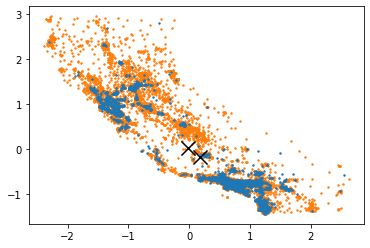

In [0]:
plot_ten_results([2])

cluster with 3 partition:

****************************************************
SSE Value:
122226.84049712594
STD debug [[0.36846253 0.26011463 0.92314564 0.50068212 0.53162879 0.5757951
  0.53232863 1.01889103 0.97723723 0.47604752 0.39113297 0.02173194
  0.         0.36483349]
 [0.49340888 0.47328537 1.04215483 0.52018293 0.53466511 0.53029797
  0.55195079 0.97989582 1.02490648 0.37754291 0.49929801 0.
  0.43715938 0.29592341]
 [0.97458279 0.90505438 0.71732493 1.7860858  1.60920593 1.78641419
  1.58149928 0.94324521 0.94114919 0.49872437 0.4774768  0.
  0.27347281 0.30350757]]
cluster 1 means:
longitude  mean:  0.7856649815447536
longitude std:  0.36846252538254165
latitude  mean:  -0.8163142853640522
latitude std:  0.2601146262287805
housing_median_age  mean:  0.09301862279236982
housing_median_age std:  0.9231456367289538
total_rooms  mean:  -0.21450881543624623
total_rooms std:  0.5006821210370287
total_bedrooms  mean:  -0.19626248952815858
total_bedrooms std:  0.5316287868758369

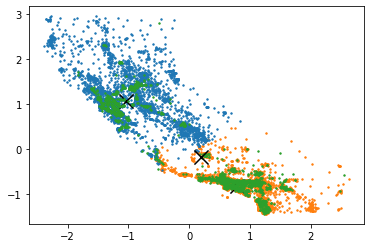

In [0]:
plot_ten_results([3])

cluster with 4 partition:

****************************************************
SSE Value:
109379.24830528992
STD debug [[0.95989317 0.90296573 0.62137763 2.38334763 1.99454953 2.67848582
  2.01404847 0.81383194 0.84356535 0.48907283 0.49829519 0.
  0.25397535 0.2648502 ]
 [0.49564631 0.47696305 1.03681278 0.44881658 0.46451831 0.4677542
  0.47839737 0.98189107 1.0252068  0.37098508 0.49955301 0.
  0.43939406 0.29315969]
 [0.36579411 0.25869272 0.90392094 0.40703696 0.42623925 0.48253412
  0.43134506 1.02246241 0.97871117 0.4746444  0.38660338 0.02288143
  0.         0.36600257]
 [0.94763156 0.87658831 0.73403781 0.78644027 0.76381341 0.79524044
  0.74002347 0.96549074 0.96423013 0.49998161 0.46111936 0.
  0.25855606 0.33134994]]
cluster 1 means:
longitude  mean:  0.3554542937740313
longitude std:  0.9598931729898179
latitude  mean:  -0.25710707214078843
latitude std:  0.9029657286674391
housing_median_age  mean:  -1.3158479113785917
housing_median_age std:  0.6213776303895359
total_ro

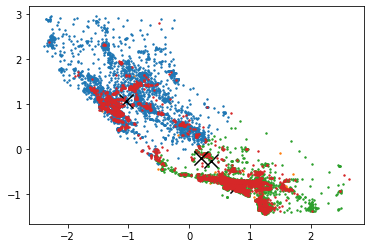

In [0]:
plot_ten_results([4])

cluster with 5 partition:

****************************************************
SSE Value:
94857.31346977968
STD debug [[0.37933739 0.27955578 0.88501852 0.39446679 0.44167421 0.50348832
  0.44414737 0.63169841 0.60201264 0.48213683 0.40918319 0.02499375
  0.         0.36120669]
 [0.51207798 0.49470316 1.03358954 0.4398692  0.46921238 0.481425
  0.48220522 0.6402118  0.72245385 0.34909845 0.49842207 0.
  0.42621959 0.27078834]
 [0.96047682 0.89316455 0.61877271 2.40288595 2.01647521 2.7113864
  2.01674873 0.82949081 0.85397277 0.49047656 0.4966765  0.
  0.25839259 0.27547945]
 [0.96813668 0.8381756  1.02086675 0.56545162 0.48156231 0.4521875
  0.49530396 1.20421588 0.70901672 0.49027773 0.2410367  0.
  0.35703731 0.39228441]
 [0.95702439 0.88926968 0.73027973 0.82142768 0.78322333 0.81426019
  0.74998447 0.79385695 0.83558297 0.49980454 0.46669448 0.
  0.26473075 0.32210951]]
cluster 1 means:
longitude  mean:  0.8079862374502392
longitude std:  0.3793373852835191
latitude  mean:  -0.81

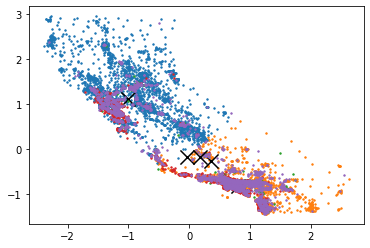

In [0]:
plot_ten_results([5])

cluster with 6 partition:

****************************************************
SSE Value:
88591.82850304093
STD debug [[0.3629901  0.26214114 0.76811484 0.2863234  0.32703691 0.39473658
  0.33642064 0.63739252 0.6511001  0.46966044 0.39200878 0.02978248
  0.         0.34485973]
 [0.50157431 0.48790456 1.02904126 0.45481734 0.48560137 0.49202196
  0.50009529 0.63615622 0.70901747 0.35474399 0.4987154  0.
  0.42589639 0.26892529]
 [0.98777488 0.86018826 1.02923948 0.57341941 0.48379863 0.46162809
  0.49877227 1.22019321 0.67947533 0.49536025 0.23886035 0.
  0.38159865 0.39572355]
 [0.9647007  0.91364677 0.58437124 2.41792001 2.05665561 2.91857861
  2.0356422  0.84266507 0.84914506 0.49664921 0.48818779 0.
  0.25573891 0.2938732 ]
 [0.43400964 0.3670013  0.73606021 0.44349709 0.47949523 0.58173122
  0.46568489 0.69409155 0.66180459 0.49727031 0.44537415 0.
  0.         0.38002987]
 [1.01299682 0.94610019 0.73074518 0.88249378 0.84556404 0.90144591
  0.78984515 0.84574693 0.90493468 0.496

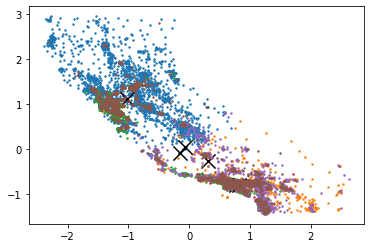

In [0]:
plot_ten_results([6])

cluster with 7 partition:

****************************************************
SSE Value:
81292.05704662882
STD debug [[0.18407316 0.23578654 0.94222333 0.47858713 0.51136387 0.49731202
  0.52837221 0.75927097 0.85889488 0.43570042 0.21416575 0.
  0.49931363 0.3764276 ]
 [0.56629101 0.5917039  0.88624942 0.46786006 0.48650808 0.50318374
  0.49953038 0.58671916 0.41502161 0.27226158 0.37483399 0.
  0.23460115 0.17061807]
 [0.76293618 0.64576563 0.98996473 0.59046612 0.47232838 0.44578885
  0.48310352 1.26814755 0.74599472 0.45641114 0.25561059 0.
  0.20754366 0.3845509 ]
 [0.9647007  0.91364677 0.58437124 2.41792001 2.05665561 2.91857861
  2.0356422  0.84266507 0.84914506 0.49664921 0.48818779 0.
  0.25573891 0.2938732 ]
 [0.35933303 0.2499483  0.7603075  0.28701489 0.32628837 0.39387662
  0.33576015 0.61711876 0.63925747 0.4672288  0.38633627 0.03018682
  0.         0.34537495]
 [1.01332103 0.94329785 0.70207302 0.8781133  0.85062696 0.89704554
  0.7943281  0.84379012 0.89858159 0.497

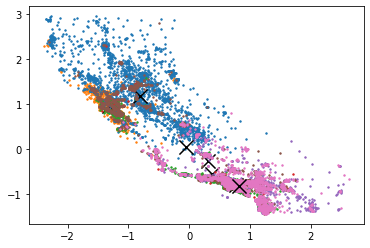

In [0]:
plot_ten_results([7])

cluster with 8 partition:

****************************************************
SSE Value:
76414.0302986184
STD debug [[0.95423468 0.92084649 0.55892513 2.44065158 2.08054142 2.98338756
  2.02366586 0.83670441 0.83922933 0.49717532 0.48535881 0.
  0.26850536 0.29317635]
 [0.78135419 0.66254729 0.979817   0.58702231 0.46698145 0.44110722
  0.47864616 1.26196831 0.74246698 0.45962971 0.25533055 0.
  0.21740618 0.3869331 ]
 [0.58973246 0.62600834 0.87030707 0.34270326 0.36892841 0.39362117
  0.37744884 0.55783156 0.38954105 0.23012555 0.33670241 0.
  0.21052147 0.16433555]
 [0.37287797 0.44077497 0.68908688 0.52736255 0.54442041 0.54998488
  0.54862593 0.72419501 0.77119417 0.46760287 0.48779673 0.
  0.3858429  0.30635577]
 [0.39627138 0.30655296 0.74304112 0.46128229 0.49743455 0.59504787
  0.47905934 0.65153616 0.65913099 0.49615232 0.43937938 0.
  0.         0.38143403]
 [0.1889049  0.24252665 0.78226106 0.37763646 0.42973855 0.39626149
  0.44161541 0.76057566 0.92118213 0.38975812 0.2

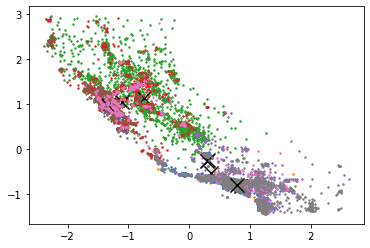

In [0]:
plot_ten_results([8])

cluster with 9 partition:

****************************************************
SSE Value:
73936.64940783373
STD debug [[0.18781916 0.24135316 0.76579673 0.37983267 0.43423967 0.39845982
  0.44618042 0.75575226 0.92443327 0.38656021 0.21095706 0.
  0.48991369 0.3760931 ]
 [0.37999295 0.44044512 0.67880732 0.51864902 0.53841084 0.54469387
  0.5434037  0.72301565 0.76125902 0.46646123 0.48953956 0.
  0.38401828 0.30262416]
 [0.78838522 0.66938313 0.97004732 0.585369   0.47305355 0.43718386
  0.48355689 1.27151154 0.72345299 0.46011277 0.25128375 0.
  0.22057244 0.38853483]
 [0.41548109 0.31537082 0.70966642 0.43240226 0.46905598 0.57679052
  0.46429342 0.6560467  0.61041754 0.49859869 0.44492075 0.
  0.         0.39287436]
 [0.58768465 0.62789622 0.86914199 0.33940898 0.36628776 0.39307897
  0.3757137  0.55439443 0.38688558 0.22788495 0.33567324 0.
  0.20953948 0.16625996]
 [0.33198053 0.22566843 0.66346781 0.28932035 0.33672282 0.40559853
  0.34661528 0.61020586 0.6486928  0.45263128 0.

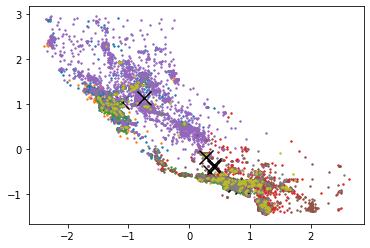

In [0]:
plot_ten_results([9])

cluster with 10 partition:

****************************************************
SSE Value:
70596.98491265335
STD debug [[0.38692625 0.44278803 0.67533454 0.52170425 0.54173517 0.54526365
  0.54698154 0.72056319 0.75871034 0.46682893 0.4899369  0.
  0.38141065 0.30290688]
 [0.49357634 0.35042922 0.58192805 0.37293318 0.39332458 0.40438922
  0.38048949 0.70521488 0.6015241  0.48776593 0.48226307 0.
  0.         0.42824776]
 [0.1845331  0.23529456 0.76839039 0.3798501  0.43508872 0.39910216
  0.44701252 0.74323107 0.91978919 0.38803871 0.21256512 0.
  0.49022844 0.3752087 ]
 [0.58506063 0.62102825 0.86618492 0.34018756 0.36913538 0.39559905
  0.37839583 0.54683896 0.38135316 0.22544856 0.33497446 0.
  0.21454463 0.16125042]
 [0.98772922 0.92950208 0.59884359 1.43160166 1.21618937 1.30799989
  1.12535541 0.83624747 0.84705247 0.4890052  0.4968372  0.
  0.27162407 0.27162407]
 [0.96916644 0.9003938  0.70131752 0.80866208 0.7740302  0.84290977
  0.70043639 0.8923587  0.90993417 0.4978923  0

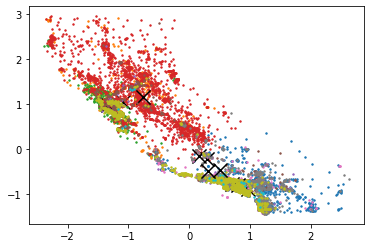

In [0]:
plot_ten_results([10])

# Answer:
When I apply k=2, the algorithm did not really separate the clusters into Northern and Southern regions. Instead,the big cities regions are clustered together such as LA, San Francisco, San Diego etc in comparison with rurual areas. This can be attributed to which the price in larger city certainly is higher and more people live in those metroplitan areas. 

Then I apply value to k from 2 to 10. As the number of clusters increase, more patterns start to emerge as well. However, due to the fact that many points are overlapping in the plots, it is difficult to tell some of the patterns. Nevertheless, the Silicon Valley area does become more pronounced, but it does not specifically separate from san francisco. Instead the coastline are more organized into one cluster. The northeast part of the California is clustered together because it is more rurual.

- - -
## 4. WRITING ON THE INTUITION FOR THE CALIFORNIA HOUSING CRISIS (10 pts)

This question is a qualitative one, and is intended to let you experiment with a real world clustering task. Hopefully it gives you some intuition as for how the preset number of clusters affects the clustering results. Too few clusters may not reveal the information that is in the data. Too many clusters may hurt data analysis as well, as it may not generalize (and in this sense, it is equivalent to over fitting).

Write at least one paragraph to demonstrate your intuition on the California Housing Crisis. You might also want to mention some possible solutions to solve it. You will receive credits based upon your insights and intuitions on this challenge. 



# Answer
From the results of the clusters, it appears to me that, as most people are gathered in the metropolitan cities such as LA, San Francisco, etc, the housing prices are higher comparing to the rural areas such as Yosemite or Lake Tahoe. This could potentially lead to a shortage of housing, thus increasing the housing prices. This is a difficult challenge to solve because the metroplitan cities are where the jobs are, such as Hollywood, Silicon Valley, etc, and from the clusters, we can tell that the income level is usually higher there. One of the possible solution could be encouraging the company to spread out instead of all gathering at the silicon valley. This might help alleviate the housing crisis.